# Lecture 3 - Creating Features

## Giới thiệu

Khi bạn đã xác định được một tập hợp các đặc trưng có tiềm năng, đã đến lúc bắt đầu phát triển chúng. Trong bài học này, bạn sẽ học một số phép biến đổi phổ biến có thể thực hiện hoàn toàn trong *Pandas*. Nếu bạn cảm thấy chưa quen thuộc, chúng tôi có một khóa học tuyệt vời về [Pandas](https://www.kaggle.com/learn/pandas).

Chúng ta sẽ sử dụng bốn tập dữ liệu trong bài học này, bao gồm nhiều loại đặc trưng khác nhau: [*US Traffic Accidents*](https://www.kaggle.com/sobhanmoosavi/us-accidents), [*1985 Automobiles*](https://www.kaggle.com/toramky/automobile-dataset), [*Concrete Formulations*](https://www.kaggle.com/sinamhd9/concrete-comprehensive-strength), và [*Customer Lifetime Value*](https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data). Ô ẩn dưới đây sẽ tải các tập dữ liệu này lên.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

accidents = pd.read_csv("accidents.csv")
autos = pd.read_csv("autos.csv")
concrete = pd.read_csv("concrete.csv")
customer = pd.read_csv("customer.csv")

> **Mẹo khám phá đặc trưng mới**  
> - Hiểu rõ các đặc trưng. Tham khảo *tài liệu dữ liệu* (*data documentation*) của tập dữ liệu nếu có.  
> - Nghiên cứu lĩnh vực của vấn đề để có được *domain knowledge* (*kiến thức chuyên ngành*). Nếu vấn đề của bạn là dự đoán giá nhà, hãy tìm hiểu về thị trường bất động sản. Wikipedia có thể là một điểm khởi đầu tốt, nhưng sách và các [bài báo khoa học](https://scholar.google.com/) thường cung cấp thông tin chính xác nhất.  
> - Nghiên cứu các công trình trước đó. Các [bài viết giải thích](https://www.kaggle.com/sudalairajkumar/winning-solutions-of-kaggle-competitions) từ các cuộc thi Kaggle trước đây là nguồn tài nguyên tuyệt vời.  
> - Sử dụng *data visualization* (*trực quan hóa dữ liệu*). Biểu đồ có thể giúp bạn phát hiện các bất thường trong phân bố của một đặc trưng hoặc những mối quan hệ phức tạp có thể được đơn giản hóa. Hãy chắc chắn rằng bạn trực quan hóa dữ liệu trong suốt quá trình *feature engineering*.  

## Biến đổi toán học - Mathematical Transforms

Mối quan hệ giữa các đặc trưng dạng số (*numerical features*) thường được biểu diễn thông qua các công thức toán học, điều mà bạn sẽ thường gặp trong quá trình nghiên cứu lĩnh vực chuyên môn (*domain research*). Trong *Pandas*, bạn có thể thực hiện các phép toán số học trên các cột giống như khi thao tác với các số thông thường.

Tập dữ liệu *Automobile* chứa các đặc trưng mô tả động cơ của một chiếc xe hơi. Khi nghiên cứu, bạn có thể tìm thấy nhiều công thức giúp tạo ra các đặc trưng mới có tiềm năng. Chẳng hạn, "stroke ratio" là một chỉ số đánh giá mức độ hiệu quả của động cơ so với hiệu suất của nó:

In [13]:
autos["stroke_ratio"] = autos.stroke / autos.bore

autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


Càng phức tạp một phép kết hợp, thì càng khó để một mô hình có thể học được. Ví dụ như công thức tính *displacement* (*dung tích xi-lanh*), một chỉ số đo lường công suất của động cơ:

In [14]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)

*Data visualization* (*trực quan hóa dữ liệu*) có thể gợi ý các phép biến đổi, thường là một dạng "tái cấu trúc" đặc trưng thông qua phép lũy thừa hoặc logarit.  

Chẳng hạn, phân bố của `WindSpeed` trong tập dữ liệu *US Accidents* bị lệch mạnh (*highly skewed*). Trong trường hợp này, phép logarit có hiệu quả trong việc chuẩn hóa phân bố của nó:

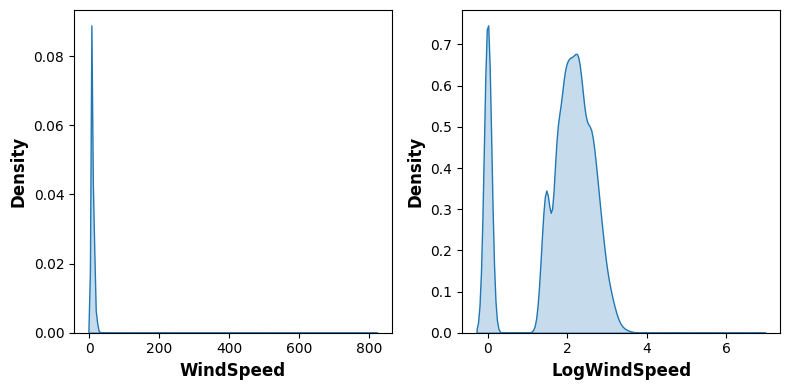

In [15]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, fill=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, fill=True, ax=axs[1]);

Hãy xem bài học của chúng tôi về [*normalization*](https://www.kaggle.com/alexisbcook/scaling-and-normalization) trong khóa học [*Data Cleaning*](https://www.kaggle.com/learn/data-cleaning), nơi bạn cũng sẽ học về *Box-Cox transformation*, một phương pháp chuẩn hóa rất tổng quát.

## Đếm số lượng - Counts

Các đặc trưng mô tả sự hiện diện hoặc vắng mặt của một yếu tố nào đó thường xuất hiện theo nhóm, chẳng hạn như tập hợp các yếu tố nguy cơ của một bệnh. Bạn có thể tổng hợp các đặc trưng này bằng cách tạo ra một **biến đếm** (*count*).

Những đặc trưng này thường là *binary* (`1` nếu Có, `0` nếu Không) hoặc *boolean* (`True` hoặc `False`). Trong Python, kiểu boolean có thể được cộng lại giống như số nguyên.

Trong tập dữ liệu *Traffic Accidents* có một số đặc trưng chỉ ra liệu có một đối tượng nào đó trên đường gần vị trí tai nạn hay không. Chúng ta có thể tạo một biến đếm tổng số đối tượng trên đường bằng cách sử dụng phương thức `sum`:

In [16]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


Bạn cũng có thể sử dụng các phương thức tích hợp của *dataframe* để *tạo* giá trị boolean.  

Trong tập dữ liệu *Concrete* có các đặc trưng thể hiện lượng thành phần trong một công thức bê tông. Nhiều công thức không chứa một hoặc nhiều thành phần (tức là thành phần đó có giá trị bằng `0`).  

Chúng ta có thể đếm số thành phần có trong một công thức bằng cách sử dụng phương thức `gt` (*greater-than*) của dataframe:

In [17]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


## Xây dựng và phân tách đặc trưng - Building-Up and Breaking-Down Features

Thường thì bạn sẽ gặp các chuỗi phức tạp có thể được phân tách thành các phần đơn giản hơn. Một số ví dụ phổ biến:
- Số ID: `'123-45-6789'`
- Số điện thoại: `'(999) 555-0123'`
- Địa chỉ đường phố: `'8241 Kaggle Ln., Goose City, NV'`
- Địa chỉ Internet: `'http://www.kaggle.com'`
- Mã sản phẩm: `'0 36000 29145 2'`
- Ngày và giờ: `'Mon Sep 30 07:06:05 2013'`

Các đặc trưng như thế này thường có một cấu trúc nhất định mà bạn có thể khai thác. Chẳng hạn, số điện thoại ở Mỹ có mã vùng (*area code*, phần `'(999)'`), giúp xác định vị trí của người gọi. Như thường lệ, việc nghiên cứu dữ liệu có thể mang lại lợi ích đáng kể.

Trình truy cập `str` (*string accessor*) cho phép bạn áp dụng các phương thức xử lý chuỗi như `split` trực tiếp lên các cột dữ liệu.  

Tập dữ liệu *Customer Lifetime Value* chứa các đặc trưng mô tả khách hàng của một công ty bảo hiểm. Từ đặc trưng `Policy`, chúng ta có thể tách `Type` (loại hợp đồng) và `Level` (mức độ bảo hiểm):

In [18]:
customer[["Type", "Level"]] = (  # Create two new features
    customer["Policy"]           # from the Policy feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


Bạn cũng có thể kết hợp các đặc trưng đơn giản thành một đặc trưng tổng hợp (*composed feature*) nếu bạn có lý do để tin rằng có một *interaction* (*hiệu ứng tương tác*) trong sự kết hợp đó:

In [19]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


> **Các nguồn khác trên Kaggle Learn**  
> Có một số loại dữ liệu khác mà chúng ta chưa đề cập ở đây nhưng lại chứa rất nhiều thông tin giá trị. May mắn thay, chúng tôi đã chuẩn bị sẵn tài liệu cho bạn!  
> - Để xử lý **ngày và giờ**, hãy xem bài học [Parsing Dates](https://www.kaggle.com/alexisbcook/parsing-dates) trong khóa học *Data Cleaning*.  
> - Để xử lý **vĩ độ và kinh độ**, hãy xem khóa học [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis).  

## Biến đổi theo nhóm - Group Transforms

Cuối cùng, chúng ta có **Group transforms** (*biến đổi theo nhóm*), phương pháp tổng hợp thông tin trên nhiều hàng dữ liệu được nhóm lại theo một danh mục nhất định. Với *group transform*, bạn có thể tạo ra các đặc trưng như:  
- "Thu nhập trung bình của tiểu bang nơi một người sinh sống"  
- "Tỷ lệ phim phát hành vào ngày trong tuần theo từng thể loại"  

Nếu bạn phát hiện ra một *category interaction* (*tương tác giữa các danh mục*), thì một *group transform* trên danh mục đó có thể là một hướng điều tra hữu ích.

Sử dụng một hàm tổng hợp (*aggregation function*), *group transform* kết hợp hai đặc trưng: một đặc trưng phân loại (*categorical feature*) dùng để nhóm dữ liệu và một đặc trưng khác có giá trị cần tổng hợp.  

Ví dụ, với đặc trưng "thu nhập trung bình theo bang" (*average income by state*), bạn sẽ chọn:  
- `State` làm đặc trưng nhóm (*grouping feature*)  
- `mean` làm hàm tổng hợp (*aggregation function*)  
- `Income` làm đặc trưng cần tổng hợp  

Để tính toán điều này trong *Pandas*, chúng ta sử dụng phương thức `groupby` và `transform`:

In [20]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


Hàm `mean` là một phương thức tích hợp sẵn của *dataframe*, vì vậy chúng ta có thể truyền nó dưới dạng một chuỗi vào `transform`.  

Các phương thức hữu ích khác bao gồm:  
- `max`, `min`, `median` (*trung vị*),  
- `var` (*phương sai*), `std` (*độ lệch chuẩn*),  
- `count` (*số lượng*).  

Dưới đây là cách bạn có thể tính tần suất xuất hiện của mỗi bang trong tập dữ liệu:

In [21]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


Bạn có thể sử dụng một phép biến đổi như thế này để tạo *frequency encoding* (*mã hóa tần suất*) cho một đặc trưng phân loại (*categorical feature*).

Nếu bạn đang sử dụng tập huấn luyện (*training set*) và tập kiểm định (*validation set*), để đảm bảo tính độc lập giữa hai tập dữ liệu, tốt nhất là chỉ sử dụng tập huấn luyện để tạo đặc trưng theo nhóm (*grouped feature*), sau đó ghép nó vào tập kiểm định.  

Chúng ta có thể sử dụng phương thức `merge` của tập kiểm định sau khi tạo tập giá trị duy nhất bằng `drop_duplicates` trên tập huấn luyện:

In [22]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Basic,378.764037
1,Extended,486.050522
2,Basic,378.764037
3,Basic,378.764037
4,Basic,378.764037
5,Basic,378.764037
6,Basic,378.764037
7,Basic,378.764037
8,Premium,658.481169
9,Basic,378.764037


> **Mẹo khi tạo đặc trưng**  
> Khi tạo đặc trưng, hãy lưu ý đến điểm mạnh và điểm yếu của mô hình mà bạn đang sử dụng. Dưới đây là một số hướng dẫn hữu ích:  
> - Mô hình *linear* (*tuyến tính*) học tốt với tổng và hiệu (*sums and differences*), nhưng không thể học các quan hệ phức tạp hơn.  
> - *Ratios* (*tỷ lệ*) thường khó học đối với hầu hết các mô hình. Việc tạo ra các đặc trưng dạng tỷ lệ thường mang lại cải thiện hiệu suất đáng kể.  
> - Mô hình *linear* và *neural networks* (*mạng nơ-ron*) thường hoạt động tốt hơn với các đặc trưng đã được *normalized* (*chuẩn hóa*). Đặc biệt, mạng nơ-ron cần các đặc trưng có giá trị không quá xa 0. Trong khi đó, các mô hình dựa trên cây (*tree-based models*) như *random forests* và *XGBoost* đôi khi có thể hưởng lợi từ *normalization*, nhưng thường ít quan trọng hơn.  
> - Mô hình *tree-based* có thể học gần như mọi kết hợp của đặc trưng, nhưng nếu một sự kết hợp đặc biệt quan trọng, việc tạo sẵn đặc trưng này vẫn có thể giúp ích, đặc biệt khi dữ liệu bị giới hạn.  
> - *Counts* (*đếm số lượng*) đặc biệt hữu ích đối với các mô hình dựa trên cây, vì các mô hình này không có cách tự nhiên để tổng hợp thông tin từ nhiều đặc trưng cùng lúc.  

## Your Turn

[**Combine and transform features**](https://www.kaggle.com/kernels/fork/14393912) from *Ames* and improve your model's performance.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*